In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset

### Load the original Tanguro201401
### Load the ensemble member
### check T, U, V, precip, LH. last day, first few days. 

ok
ok
ok
ok


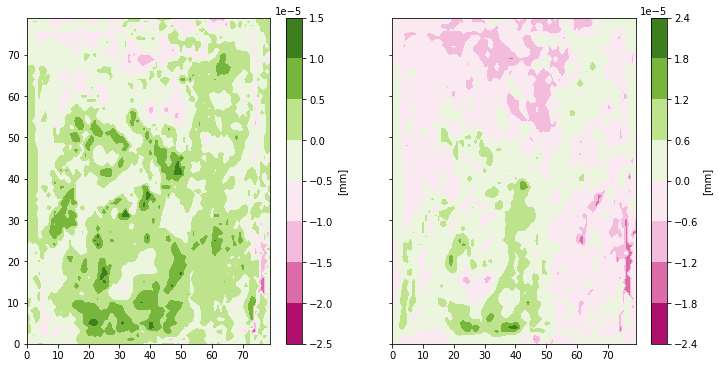

In [43]:
path = '/jet/home/xjliu/Tanguro_exp/'
with xarray.open_dataset(path+'Tanguro201401/energyflux_d01_2014-01-22_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')
with xarray.open_dataset(path+'Tanguro201401_notrees/energyflux_d01_2014-01-22_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0_notrees:
            print('ok')

with xarray.open_dataset(path+'Tanguro201401_member1/energyflux_d01_2014-01-22_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')
with xarray.open_dataset(path+'Tanguro201401_member1_notrees/energyflux_d01_2014-01-22_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1_notrees:
        print('ok')

fig,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
axes = axes.ravel()
im0 = axes[0].contourf(ds0_notrees['QFX'][10,:,:]-ds0['QFX'][10,:,:],cmap='PiYG')
im1 = axes[1].contourf(ds1_notrees['QFX'][10,:,:]-ds1['QFX'][10,:,:],cmap='PiYG')
                      #levels = np.linspace(-300,300,5))
fig.colorbar(im0,ax=axes[0],label='[mm]')
fig.colorbar(im1,ax=axes[1],label='[mm]')


In [13]:
ds1

<xarray.Dataset>
Dimensions:   (Time: 24, bottom_top: 34, bottom_top_stag: 35, south_north: 80, south_north_stag: 81, west_east: 80, west_east_stag: 81)
Coordinates:
    XLAT      (Time, south_north, west_east) float32 ...
    XLONG     (Time, south_north, west_east) float32 ...
    XTIME     (Time) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables: (12/24)
    Times     (Time) |S19 ...
    LU_INDEX  (Time, south_north, west_east) float32 ...
    U         (Time, bottom_top, south_north, west_east_stag) float32 ...
    V         (Time, bottom_top, south_north_stag, west_east) float32 ...
    W         (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH        (Time, bottom_top_stag, south_north, west_east) float32 ...
    ...        ...
    QRAIN     (Time, bottom_top, south_north, west_east) float32 ...
    TSK       (Time, south_north, west_east) float32 ...
    RAINC     (Time, south_north, west_east) float32 ...
    RAINSH    (Time, south_north, west_east) float32 ...
    RAINNC    (Time, south_north, west_east) float32 ...
    CLDFRA    (Time, bottom_top, south_north, west_east) float32 ...
Attributes: (12/85)
    TITLE:                            OUTPUT FROM WRF V4.3 MODEL
    START_DATE:                      2014-01-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        81
    SOUTH-NORTH_GRID_DIMENSION:      81
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

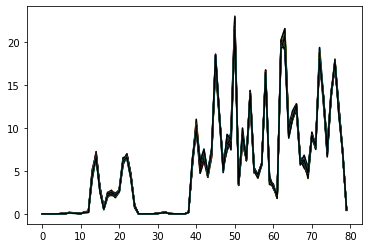

In [15]:
for ii in range(10):
    plt.plot(np.arange(80),precip_notrees[ii,:])
    plt.plot(np.arange(80),precip_notrees[ii,:],'-k')


### Check the input data first

ok
ok


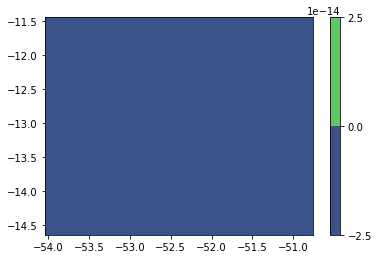

In [20]:
with xarray.open_dataset(path+'Tanguro201409_201501_member8/3Dfields_d01_2014-12-19_00:00:00',decode_times=False,
                         mask_and_scale='False') as ds0:
    print('ok')
with xarray.open_dataset(path+'Tanguro201409_201501_member8_notrees/3Dfields_d01_2014-12-19_00:00:00',decode_times=False,
                         mask_and_scale='False') as ds1:
    print('ok')
plt.contourf(lons,lats,(ds1['RAINNC'][-1,:80,:80]-ds0['RAINNC'][-1,:80,:80]))
plt.colorbar()

ok
ok


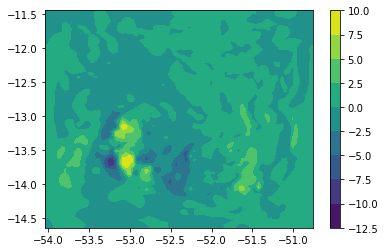

In [20]:
with xarray.open_dataset(path+'Tanguro201501/3Dfields_d01_2015-01-03_00:00:00',decode_times=False,
                         mask_and_scale='False') as ds0:
    print('ok')
with xarray.open_dataset(path+'perturbTU_sameBdy/bak/3Dfields_d01_2015-01-03_00:00:00',decode_times=False,
#with xarray.open_dataset(path+'Tanguro201409_201501/wrfinput_d01',decode_times=True,
                         mask_and_scale='False') as ds1:
    print('ok')
#with xarray.open_dataset(path+'Tanguro201409_201501_member0/wrfinput_d01',decode_times=False,
#with xarray.open_dataset(path+'Tanguro201409_201501_member2/3Dfields_d01_2014-09-01_00:00:00',decode_times=False,
#                         mask_and_scale='False') as ds2:
#    print('ok')
plt.contourf(lons,lats,(ds1['U'][2,0,:,:80]-ds0['U'][2,0,:,:80]))
plt.colorbar()

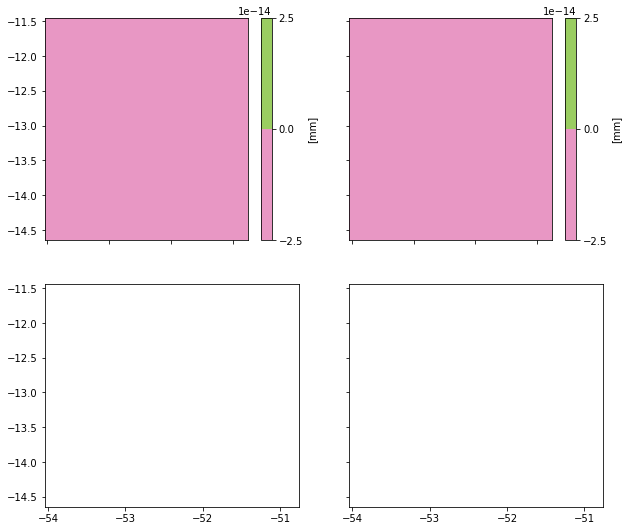

In [33]:
fig,axes = plt.subplots(2,2,figsize=(10,9),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()
im0 = axes[0].contourf(lons,lats,ds1['CLDFRA'][11,1,:,:80],cmap='PiYG')
im1 = axes[1].contourf(lons,lats,ds2['CLDFRA'][11,1,:,:80],cmap='PiYG')
                      #levels = np.linspace(-300,300,5))
fig.colorbar(im0,ax=axes[0],label='[mm]')
fig.colorbar(im1,ax=axes[1],label='[mm]')
#.colorbar()

ok
ok
ok
ok


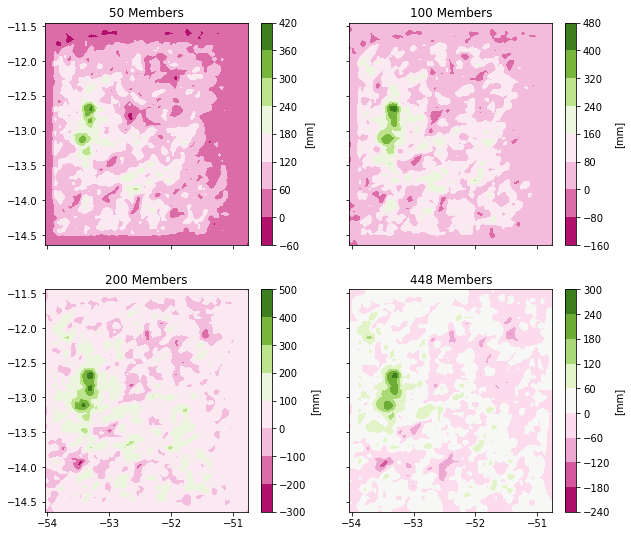

In [7]:
fig,axes = plt.subplots(2,2,figsize=(10,9),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

for ii,num in enumerate([50,100,200,448]):
    file = path+'Tanguro201409_201501/'members.nc'

    with xarray.open_dataset(file,decode_times=True,
                         mask_and_scale='True') as ds:
        print('ok')


    im = axes[ii].contourf(lons,lats,ds['RAINNC'][0,1,:,:],cmap='PiYG')
                          #levels = np.linspace(-300,300,5))
    fig.colorbar(im,ax=axes[ii],label='[mm]')
    axes[ii].set_title(str(num)+' Members')
#.colorbar()

### Ensemble members extracted from the later half

ok
ok
ok
ok


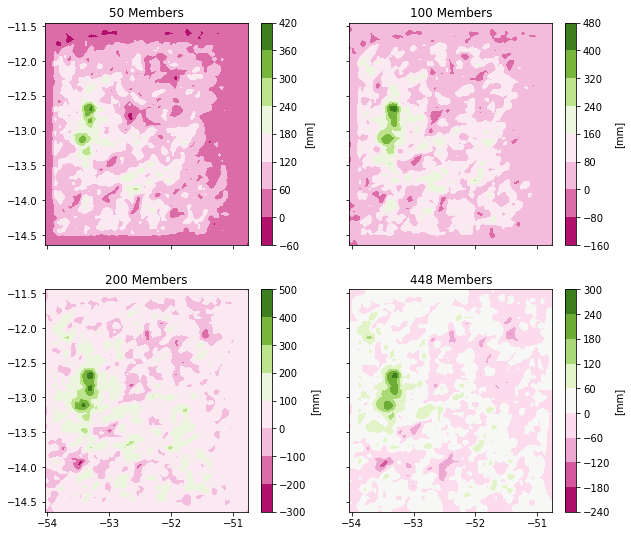

In [5]:
fig,axes = plt.subplots(2,2,figsize=(10,9),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

for ii,num in enumerate([50,100,200,448]):
    file = path+'post_processing/dif_precip_'+str(num)+'members2.nc'

    with xarray.open_dataset(file,decode_times=True,
                         mask_and_scale='True') as ds:
        print('ok')


    im = axes[ii].contourf(lons,lats,ds['RAINNC'][0,1,:,:],cmap='PiYG')
    fig.colorbar(im,ax=axes[ii],label='[mm]')
    axes[ii].set_title(str(num)+' Members')